# Lasso

In [1]:
#path=  'C:/Users/felipe/Documents/Brain/'
path = 'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'

#import sys
#sys.path.append(path) 
#path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'

import sys
sys.path.append(path_) 

In [1]:
#C:\Users\felipe\OneDrive - Universidad Técnica Federico Santa María\Documentos

path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Aging/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Aging/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Aging/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
#SE ELIMINA CUBA DEL DATASET
df_CN_filtrado = df_CN_filtrado[~df_CN_filtrado['Country_ID'].str.startswith('CUB')].reset_index(drop=True)

df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

In [6]:
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

lista_dfs = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [7]:
model = LassoRegressor()
Plotters = Plotter()

# Hyperparameter Tuning

In [9]:
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [10]:
with open(f'{path}Brain_Aging/Opt_Model/opt_Lasso_sin_Cuba.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'{path}Brain_Aging/Opt_Model/opt_Lasso.pickle', 'rb') as file:
    opt_model= pickle.load(file)

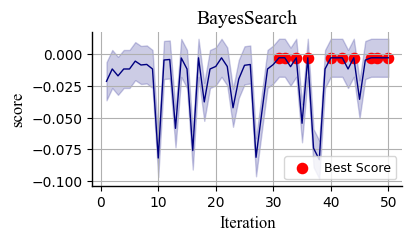

Top 1: Iteration 31, Score -0.0028400654872037688
Top 2: Iteration 44, Score -0.002843424357883728
Top 3: Iteration 48, Score -0.00284576458976058
Top 4: Iteration 32, Score -0.0028574808937119724
Top 5: Iteration 50, Score -0.002857639200218742
Top 6: Iteration 36, Score -0.0028586090154390288
Top 7: Iteration 47, Score -0.0028741950599717294
Top 8: Iteration 42, Score -0.0028759675637346715
Top 9: Iteration 40, Score -0.002876615562264173
Top 10: Iteration 34, Score -0.002878329131422608


In [11]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [12]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.6132091642205572, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6123008621484702, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6106560745071354, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6059333302902097, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6065113218755454, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.6056535543205754, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6004728264838357, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.5970596972857519, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.6004664806951011, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.5970804655566707, 'max_iter': 100, 'tol': 1e-05}]

# Training

In [13]:
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_concatenado_CN, lista_dfs, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

In [14]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]

with open('results_model/resultados_modelo_Sin_Cuba.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [7]:
with open('results_model/resultados_modelo_sin_Cuba.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [79]:
results_labels_df_AD=results_labels_list[0]
results_labels_df_FTD=results_labels_list[1]
results_labels_df_MCI=results_labels_list[2]
results_labels_df_PD=results_labels_list[3]

results_labels_df_total = [results_labels_df_CN_test, results_labels_df_AD, results_labels_df_FTD,results_labels_df_MCI,results_labels_df_PD]

results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]
results_avg_list_PD = results_avg_list[4]

df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = results_avg_list_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = results_avg_list_FTD.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = results_avg_list_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')

df_PD_seleccion = df_PD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_PD_combined = results_avg_list_PD.merge(df_PD_seleccion, on='ID-unique', how='left')


In [16]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_combined_sin_Cuba.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_combined_sin_Cuba.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_combined_sin_Cuba.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_combined_sin_Cuba.xlsx', index=False)
df_PD_combined.to_excel('results/df_PD_combined_sin_Cuba.xlsx', index=False)


C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


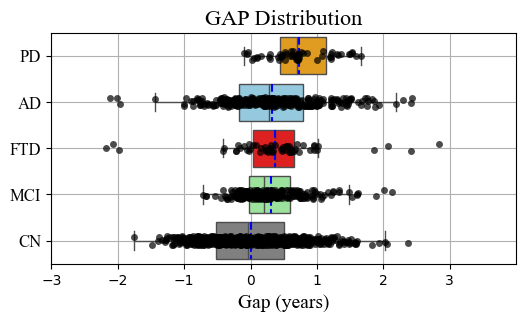

In [83]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])
corrected_gap_PD = pd.to_numeric(results_avg_list[4]['GAP_corrected'])

data = {
    'Error': np.concatenate([corrected_gap_PD, corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['PD'] * len(corrected_gap_PD) + ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

CN - Pendiente: 0.007599046606780874, Intercepto: 65.6797949565569
AD - Pendiente: 0.022373391010870644, Intercepto: 64.95797250742002
FTD - Pendiente: -0.02095401909772833, Intercepto: 68.05458762848556
MCI - Pendiente: -0.0005273082502907378, Intercepto: 66.53080045837463
PD - Pendiente: -0.00041749533169193264, Intercepto: 66.9190185482212


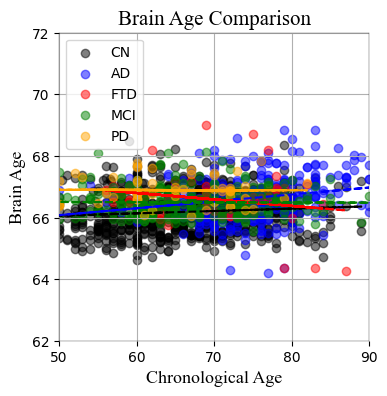

In [84]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred']].copy()
results_avg_FTD     = results_avg_list[2][['y_labels', 'y_pred']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred']].copy()
results_avg_PD = results_avg_list[4][['y_labels', 'y_pred']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI, results_avg_PD]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green', 'PD': 'orange'}
labels = ['CN', 'AD', 'FTD', 'MCI', 'PD']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=62,x_max_limit=90,y_max_limit=72,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)

# SHAP

In [19]:
import shap
import numpy as np
import pandas as pd

def shap_values_calculate(df_train, df_test, results_per_fold_train, results_per_fold_test, results_model, feature_col_range):
    shap_values_dict = {id_unique: [] for id_unique in df_test['ID-unique'].unique()}
    
    for i in range(20):
        for k in range(10):

            # Train
            ID_train_fold = results_per_fold_train[i][k]['ID-unique']
            df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
            X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
            y_train_kf = df_train_fold.iloc[:, -2]  # Labels

            # Test
            ID_test_fold = results_per_fold_test[i][k]['ID-unique']
            df_test_fold = df_test[df_test['ID-unique'].isin(ID_test_fold)]
            X_test_kf = df_test_fold.iloc[:, feature_col_range]  # Features
            y_test_kf = df_test_fold.iloc[:, -2]  # Labels

            # Scaling
            mean_X_train_kf = results_model['mean_X_train_kf'][k + 10 * i]
            std_X_train_kf = results_model['std_X_train_kf'][k + 10 * i]

            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_kf_scaled = (X_test_kf - mean_X_train_kf) / std_X_train_kf

            model_ = results_model['model'][k + 10 * i]

            # SHAP calculation
            explainer = shap.Explainer(model_, X_train_kf_scaled)
            shap_values = explainer.shap_values(X_test_kf_scaled)

            # Store SHAP values
            for idx, id_unique in enumerate(df_test_fold['ID-unique']):
                shap_values_dict[id_unique].append(shap_values[idx])

    # Average SHAP values
    shap_values_avg_dict = {id_unique: np.mean(values, axis=0) for id_unique, values in shap_values_dict.items()}

    # Prepare SHAP summary matrix
    shap_values_avg_matrix = [shap_values_avg_dict[id_unique] for id_unique in df_test['ID-unique'].unique()]
    shap_values_avg_array = np.array(shap_values_avg_matrix)

    feature_names = X_test_kf_scaled.columns.tolist()

    shap_values_df = pd.DataFrame(shap_values_avg_array, columns=feature_names)
    shap_values_df['ID-unique'] = df_test['ID-unique'].unique()
    shap_values_df.set_index('ID-unique', inplace=True)

    # SHAP summary
    shap_sum = np.abs(shap_values_avg_array).sum(axis=0)
    shap_summary = {feature: shap_sum[i] for i, feature in enumerate(feature_names)}
    shap_summary_sorted = sorted(shap_summary.items(), key=lambda x: x[1], reverse=True)

    return shap_values_avg_array, shap_summary_sorted



In [38]:
shap_values_CN, shap_summary_sorted_CN = shap_values_calculate(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model, slice(None, -2)
)

shap_values_AD, shap_summary_sorted_AD = shap_values_calculate(
    df_concatenado_CN, df_concatenado_AD, results_per_fold_CN_train, results_per_fold_pat[0], results_model, slice(None, -2)
)

shap_values_FTD, shap_summary_sorted_FTD = shap_values_calculate(
    df_concatenado_CN, df_concatenado_FTD, results_per_fold_CN_train, results_per_fold_pat[1], results_model, slice(None, -2)
)

shap_values_MCI, shap_summary_sorted_MCI = shap_values_calculate(
    df_concatenado_CN, df_concatenado_MCI, results_per_fold_CN_train, results_per_fold_pat[2], results_model, slice(None, -2)
)

shap_values_PD, shap_summary_sorted_PD = shap_values_calculate(
    df_concatenado_CN, df_concatenado_PD, results_per_fold_CN_train, results_per_fold_pat[3], results_model, slice(None, -2)
)


In [59]:
with open('results_model/shap_summary_sorted_CN_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_CN_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_AD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_AD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

with open('results_model/shap_summary_sorted_FTD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_FTD, f)

with open('results_model/shap_values_FTD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_values_FTD, f)

with open('results_model/shap_summary_sorted_MCI_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_MCI, f)

with open('results_model/shap_values_MCI_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_values_MCI, f)

with open('results_model/shap_summary_sorted_PD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_PD, f)

with open('results_model/shap_values_PD_sin_Cuba.pkl', 'wb') as f:
    pickle.dump(shap_values_PD, f)

In [9]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_CN_sin_Cuba.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_CN_sin_Cuba.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_AD_sin_Cuba.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_AD_sin_Cuba.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

with open('results_model/shap_summary_sorted_FTD_sin_Cuba.pkl', 'rb') as f:
    shap_summary_sorted_FTD = pickle.load(f)

with open('results_model/shap_values_FTD_sin_Cuba.pkl', 'rb') as f:
    shap_values_FTD = pickle.load(f)

with open('results_model/shap_summary_sorted_MCI_sin_Cuba.pkl', 'rb') as f:
    shap_summary_sorted_MCI = pickle.load(f)

with open('results_model/shap_values_MCI_sin_Cuba.pkl', 'rb') as f:
    shap_values_MCI = pickle.load(f)

with open('results_model/shap_summary_sorted_PD_sin_Cuba.pkl', 'rb') as f:
    shap_summary_sorted_PD = pickle.load(f)

with open('results_model/shap_values_PD_sin_Cuba.pkl', 'rb') as f:
    shap_values_PD = pickle.load(f)



# SHAP CN

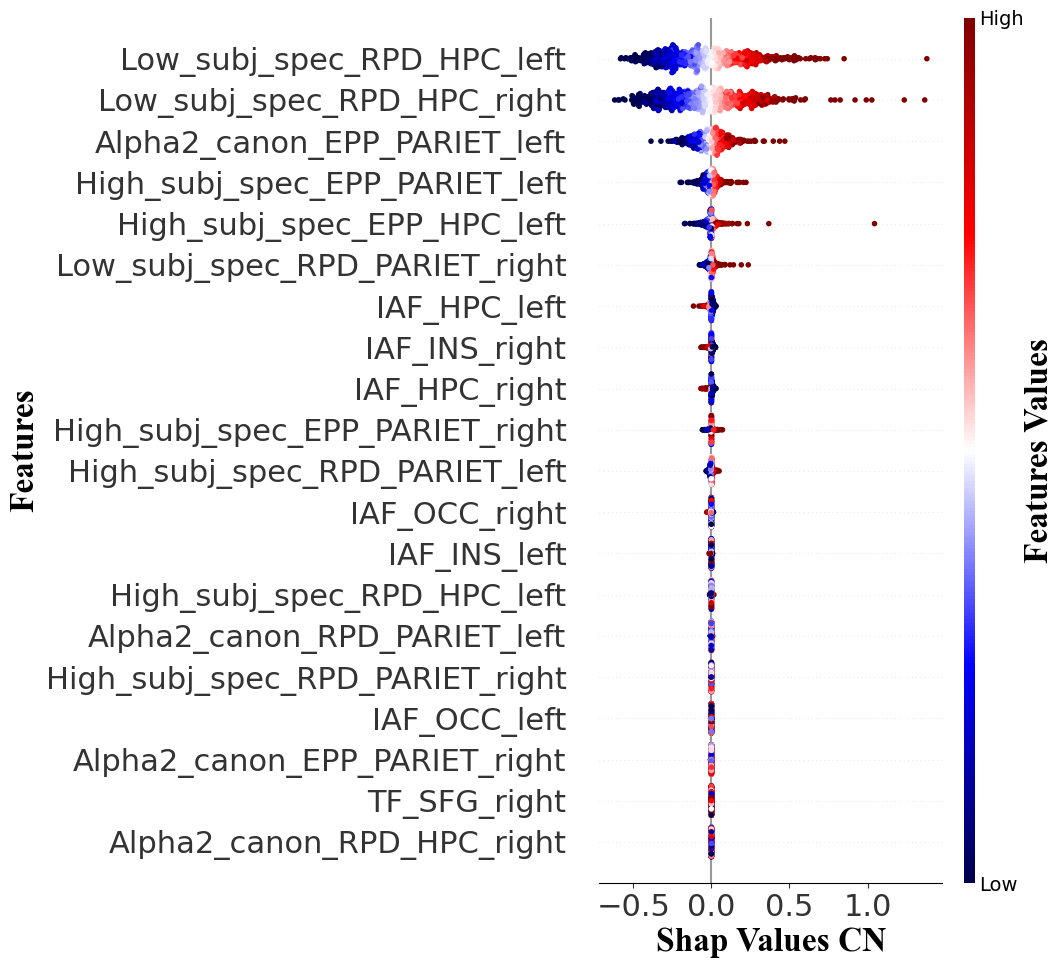

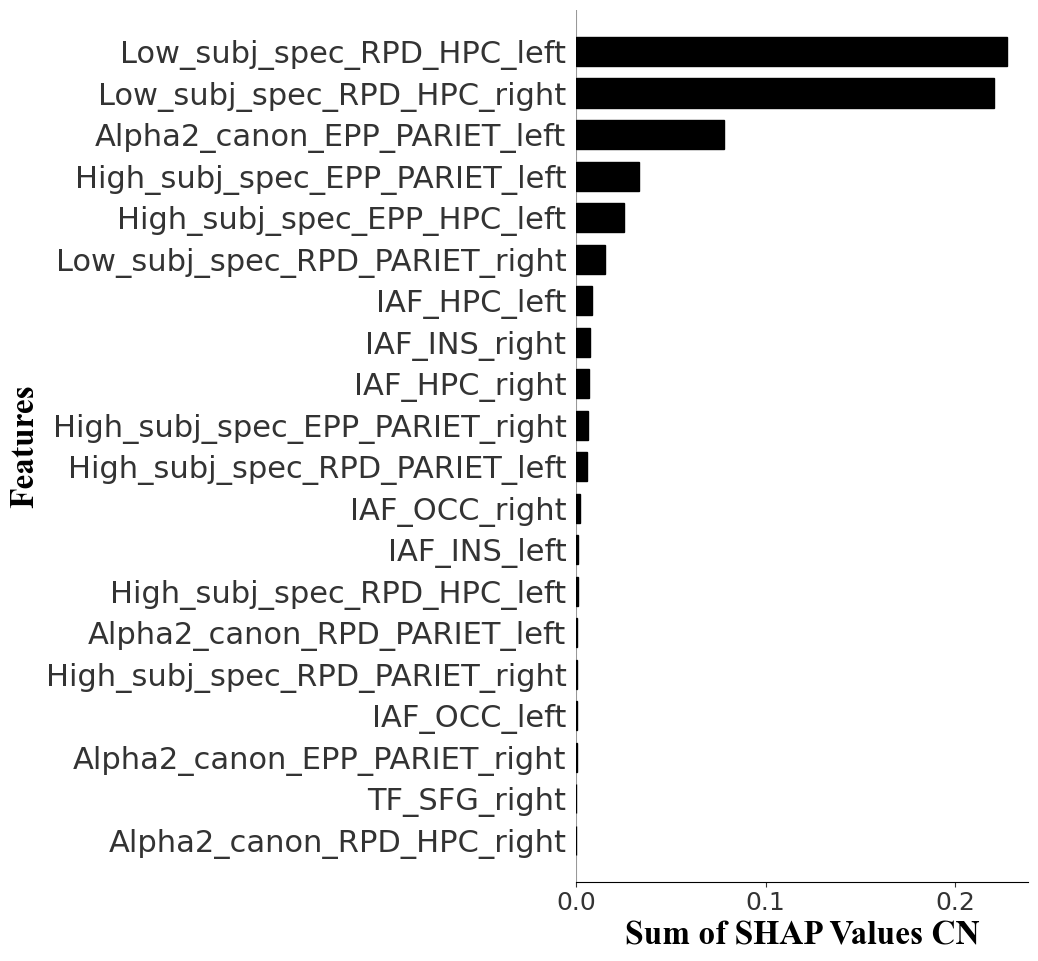

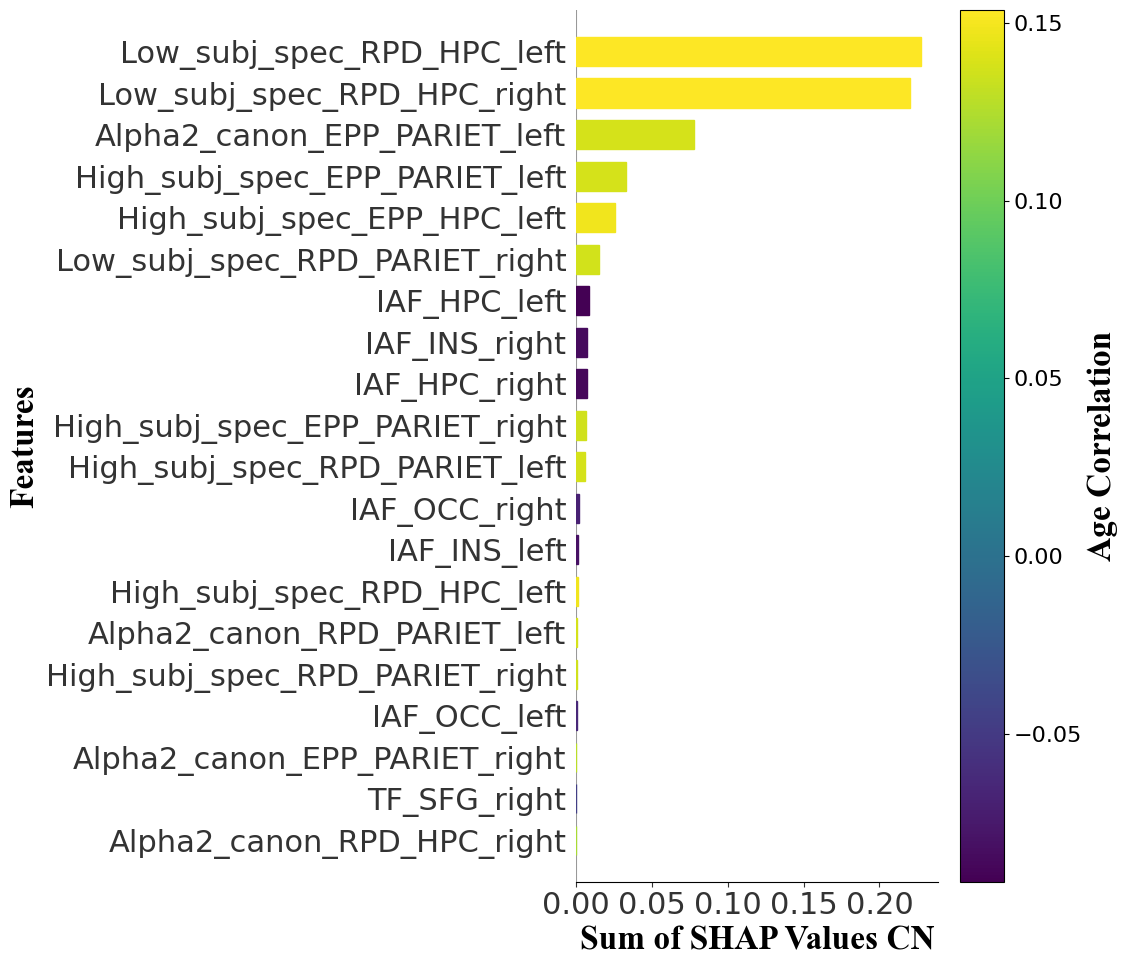

In [40]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [41]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_left: 1.000000
HPC_right: 0.865953
PARIET_left: 0.447870
PARIET_right: 0.083816
INS_right: 0.027239
OCC_right: 0.007961
INS_left: 0.004397
OCC_left: 0.000896
SFG_right: 0.000080


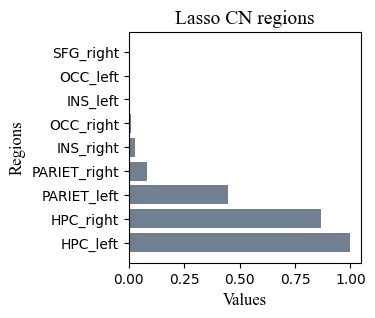

In [42]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set='Lasso CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


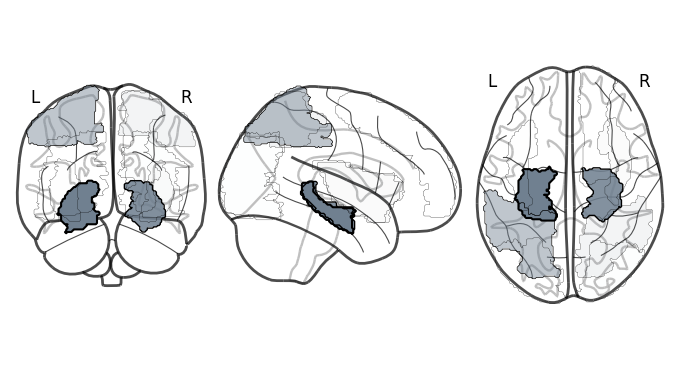

In [24]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='slategray')

# SHAP AD

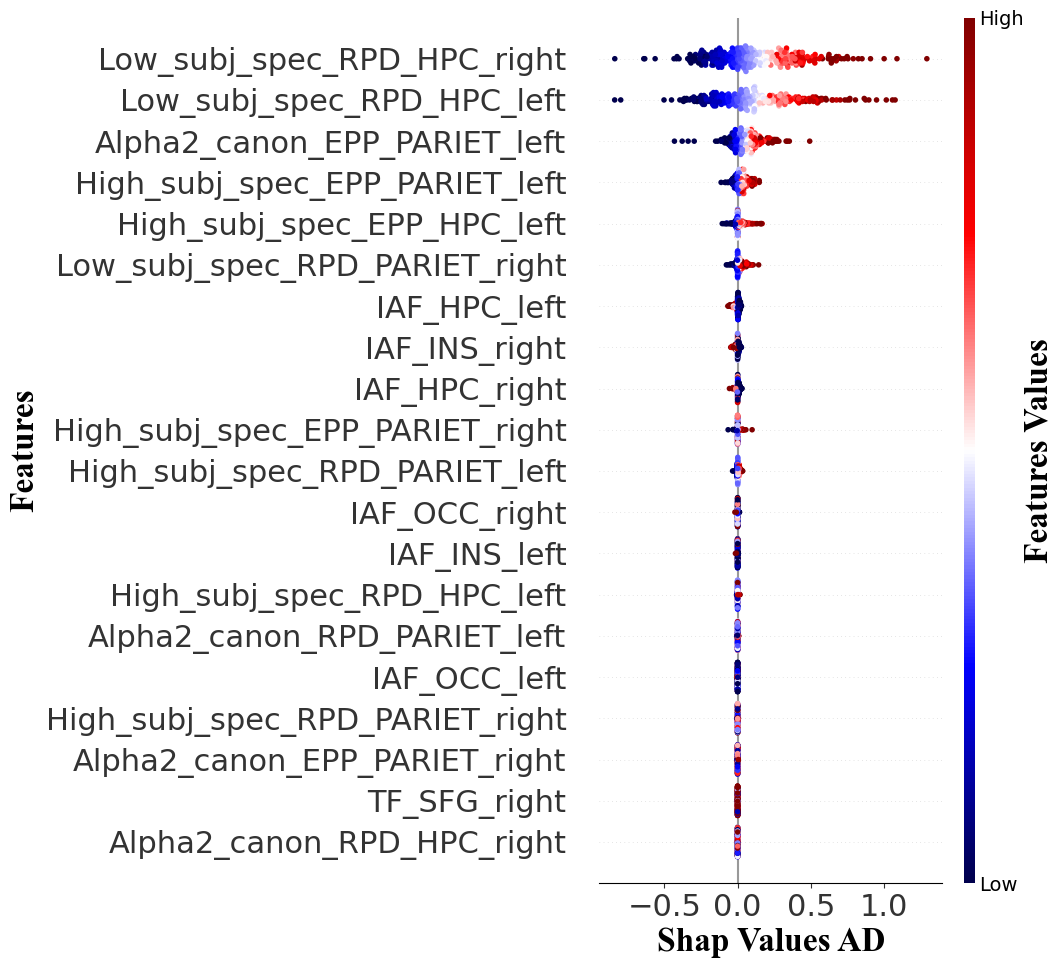

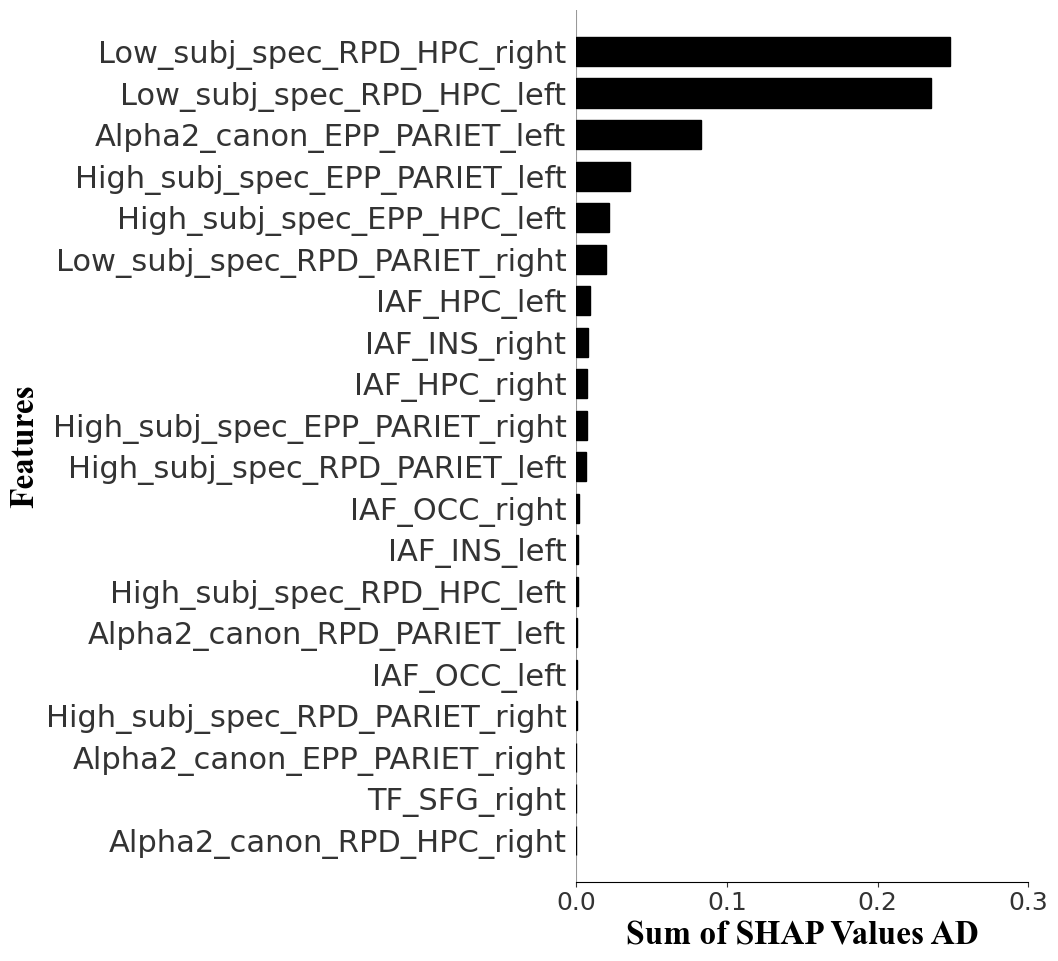

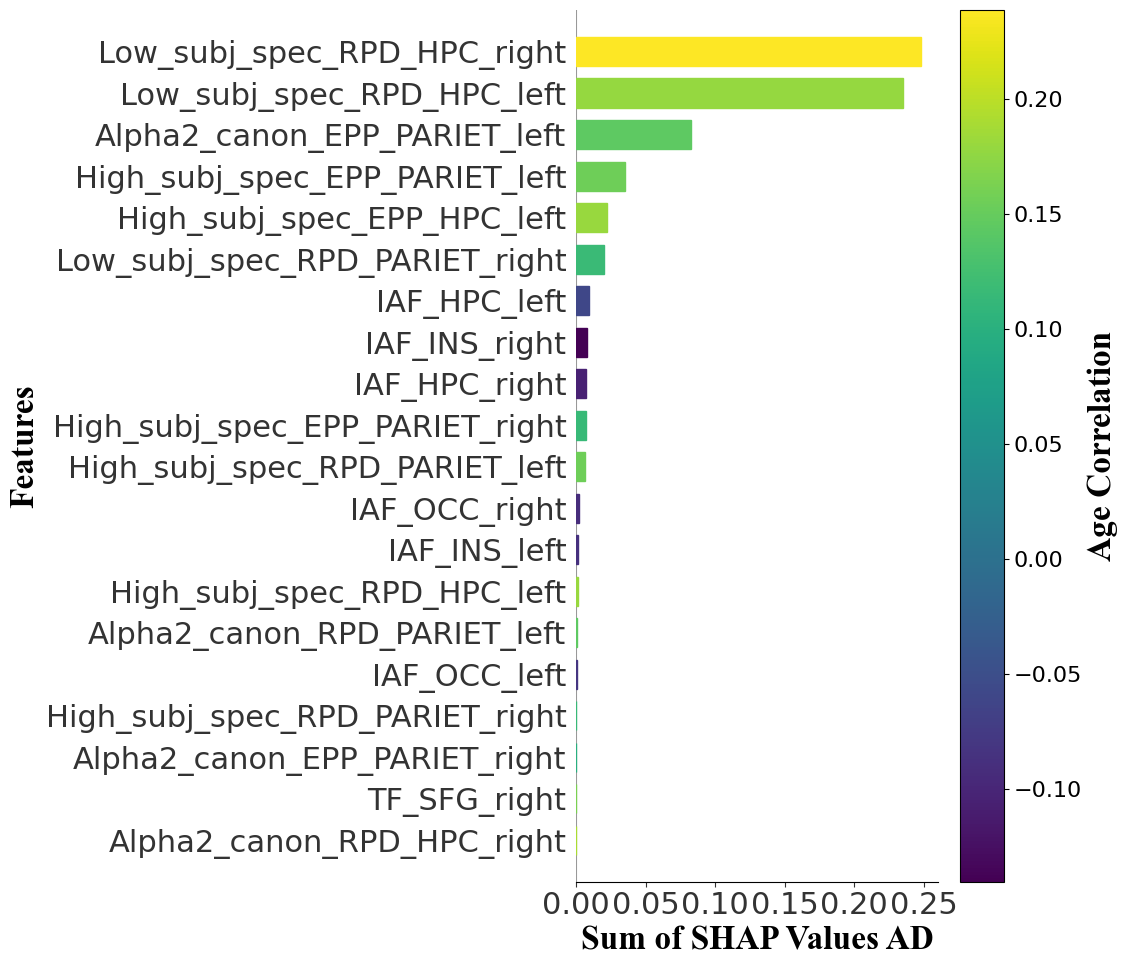

In [43]:
Plotters.plot_feature_importance(shap_values=shap_values_AD,X_test=X_AD,y_test=y_AD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values AD', xlabel2='Sum of SHAP Values AD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [44]:
shap_per_region_sorted_AD, normalized_result_sorted_AD=model.shap_region(shap_summary_sorted=shap_summary_sorted_AD, num_max=20)

HPC_left: 1.000000
HPC_right: 0.953322
PARIET_left: 0.467131
PARIET_right: 0.101778
INS_right: 0.030010
OCC_right: 0.007622
INS_left: 0.004805
OCC_left: 0.001047
SFG_right: 0.000069


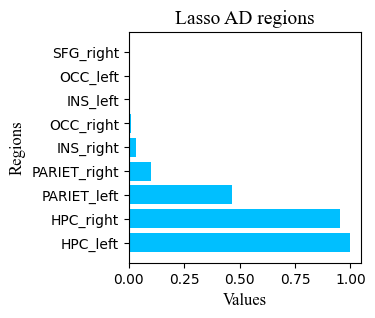

In [45]:
Plotters.plot_normalized_values(normalized_result_sorted_AD, color='deepskyblue', name_set='Lasso AD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


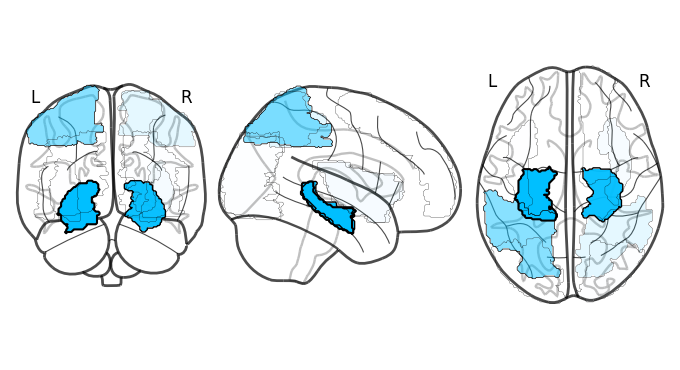

In [30]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color='deepskyblue')

# SHAP FTD

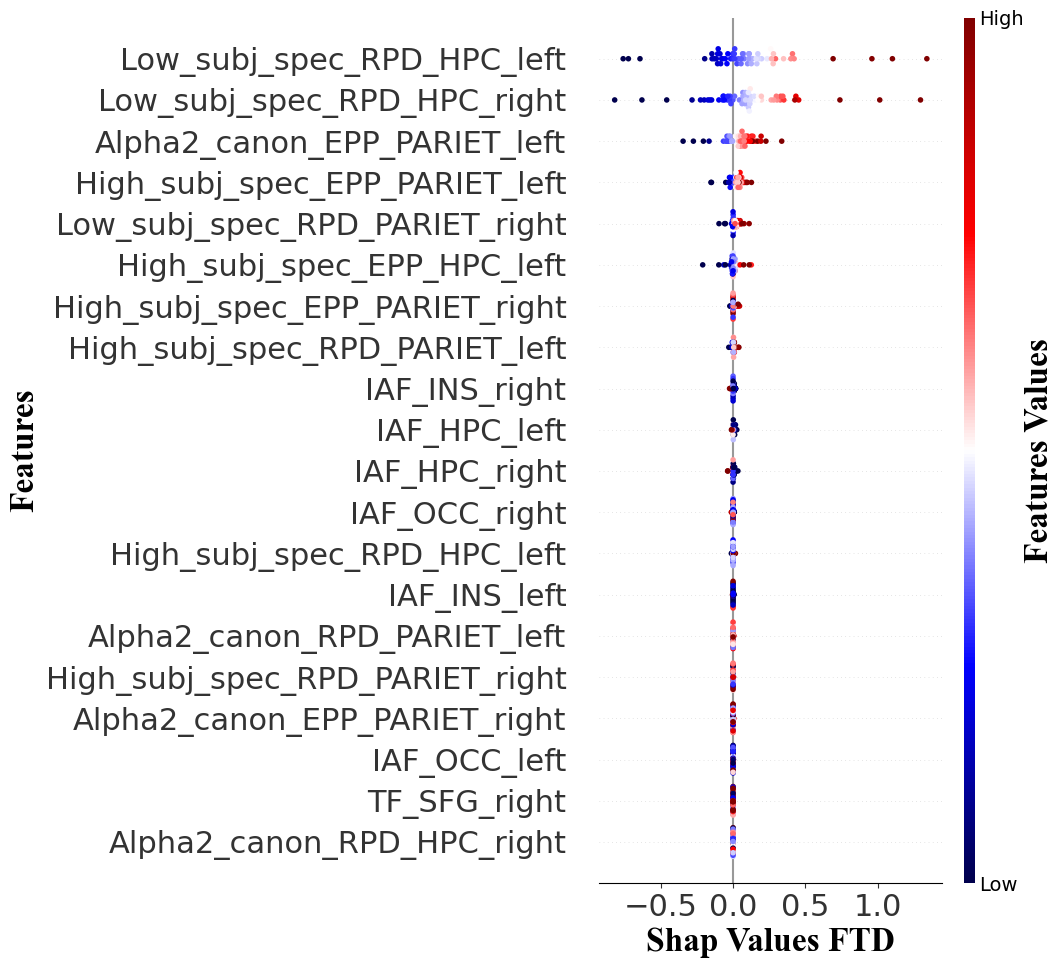

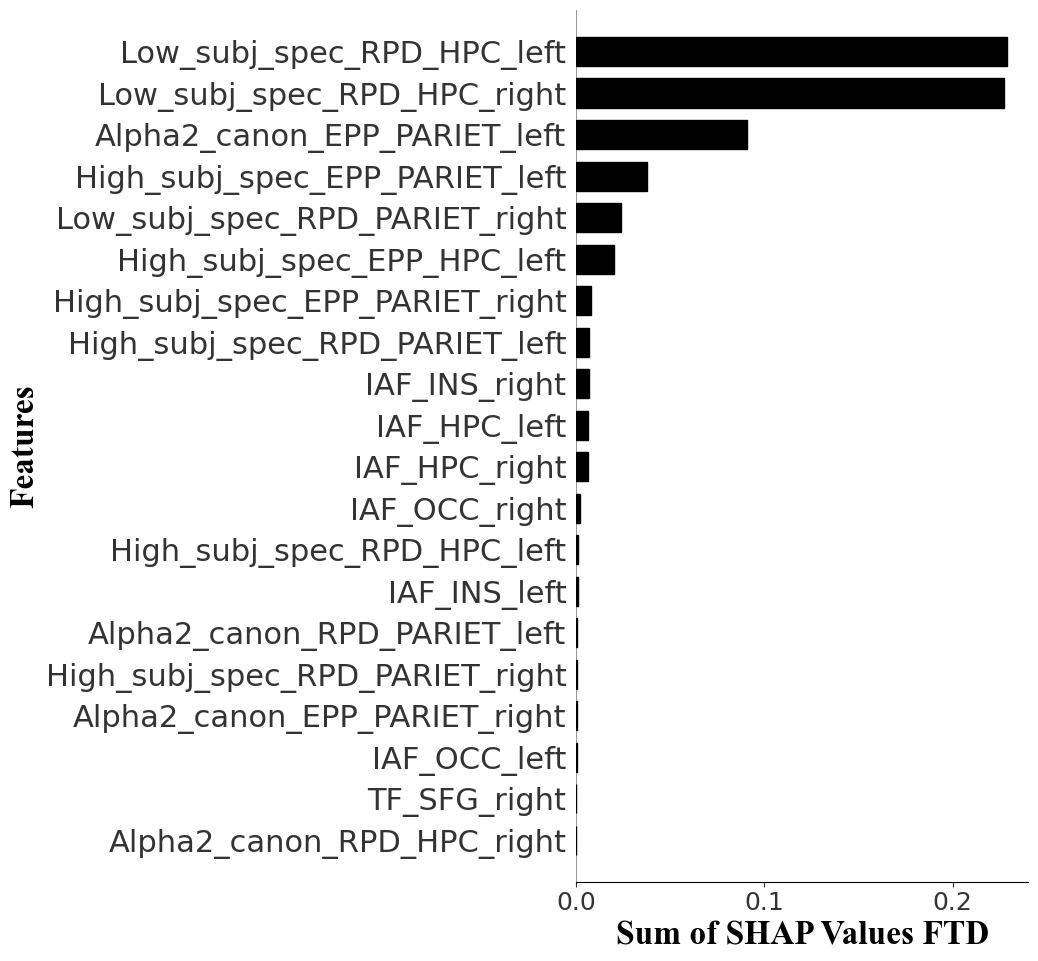

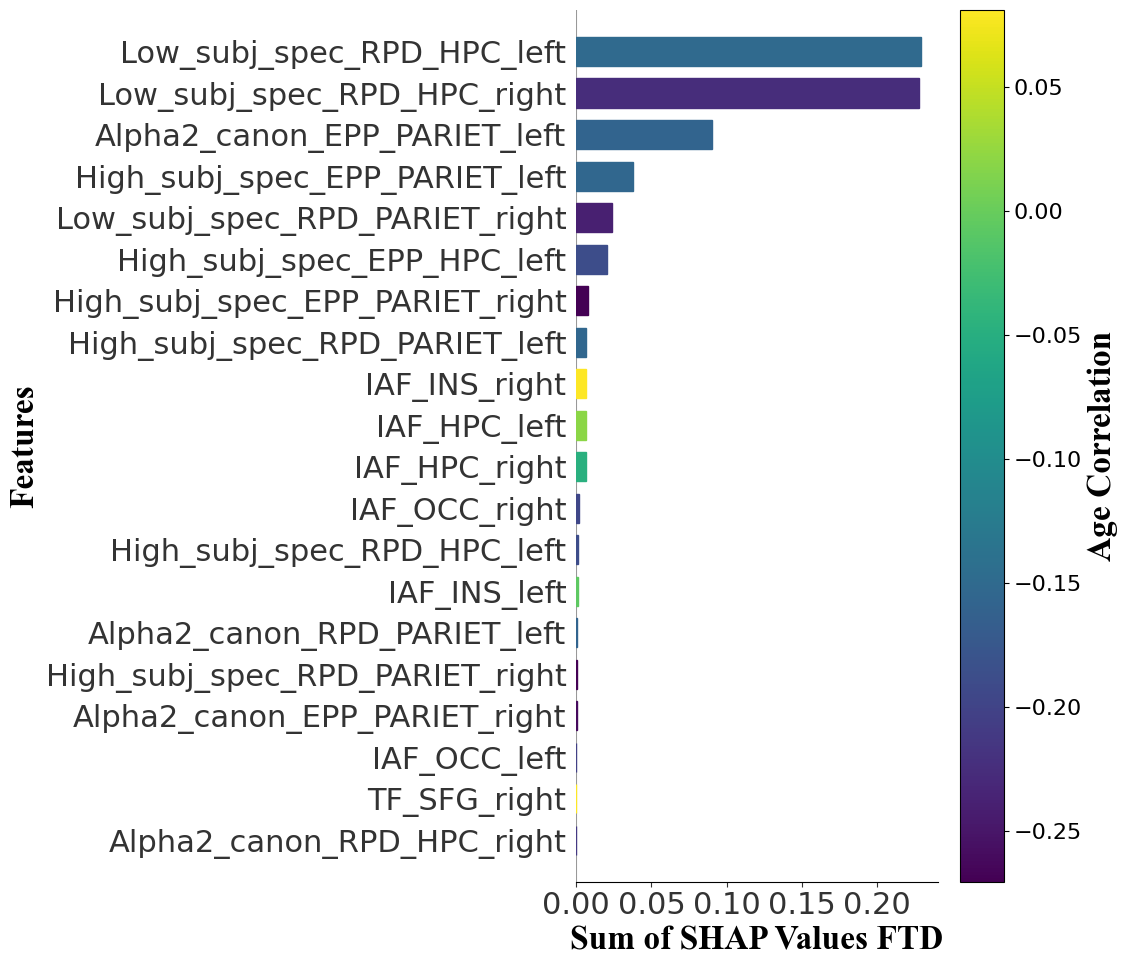

In [46]:
Plotters.plot_feature_importance(shap_values=shap_values_FTD,X_test=X_FTD,y_test=y_FTD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values FTD', xlabel2='Sum of SHAP Values FTD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [47]:
shap_per_region_sorted_FTD, normalized_result_sorted_FTD=model.shap_region(shap_summary_sorted=shap_summary_sorted_FTD, num_max=20)

HPC_left: 1.000000
HPC_right: 0.910721
PARIET_left: 0.527551
PARIET_right: 0.126367
INS_right: 0.025555
OCC_right: 0.007936
INS_left: 0.004096
OCC_left: 0.000880
SFG_right: 0.000068


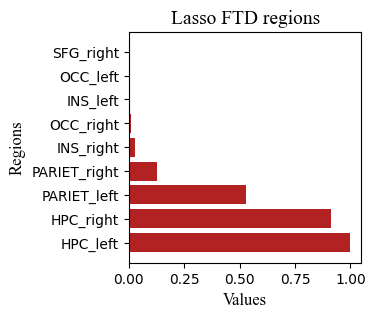

In [48]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='firebrick', name_set='Lasso FTD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


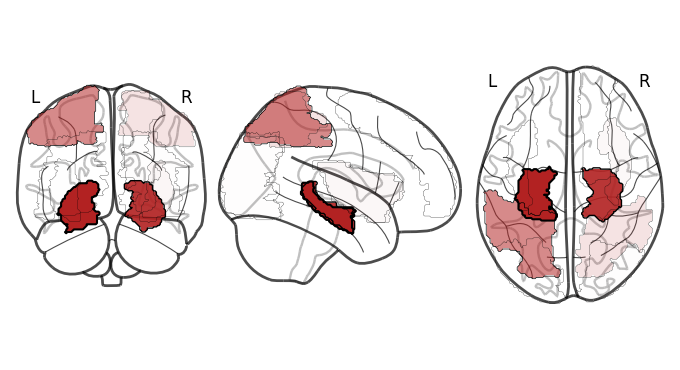

In [49]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color='firebrick')

# SHAP MCI

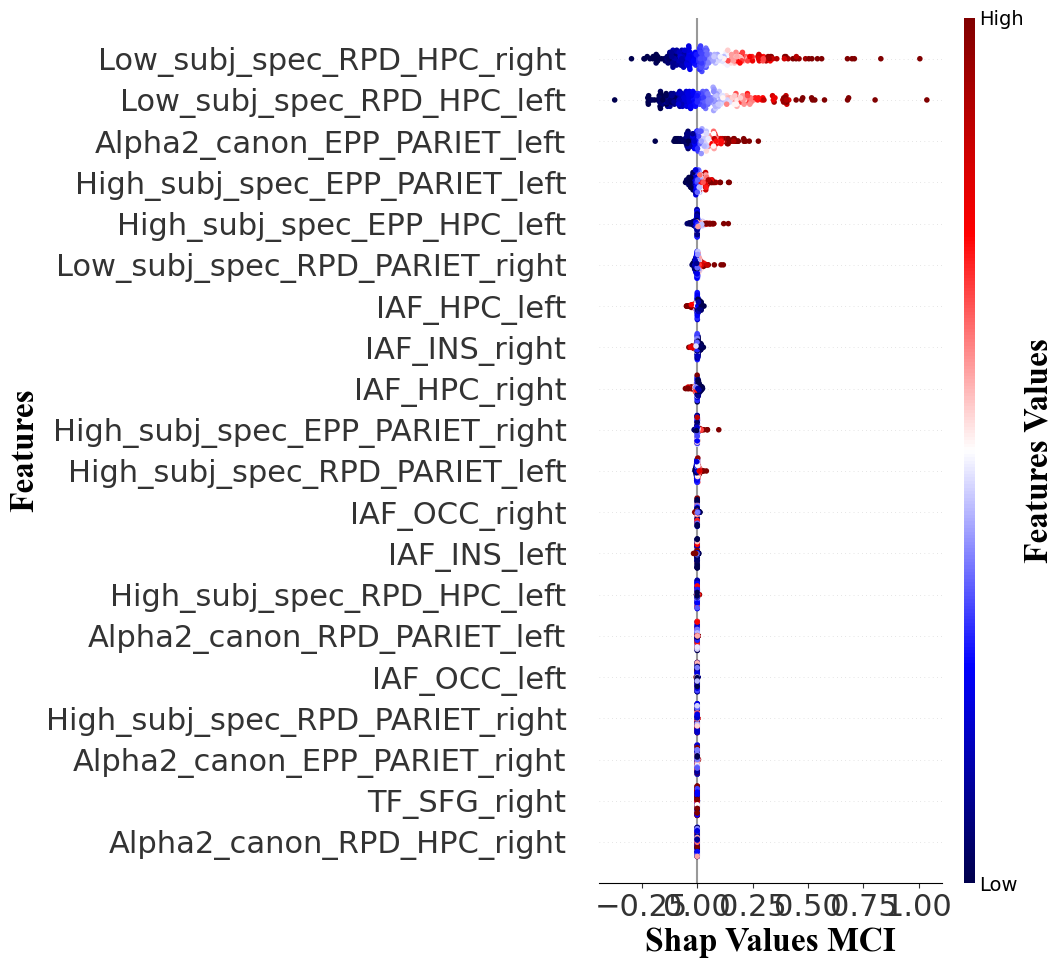

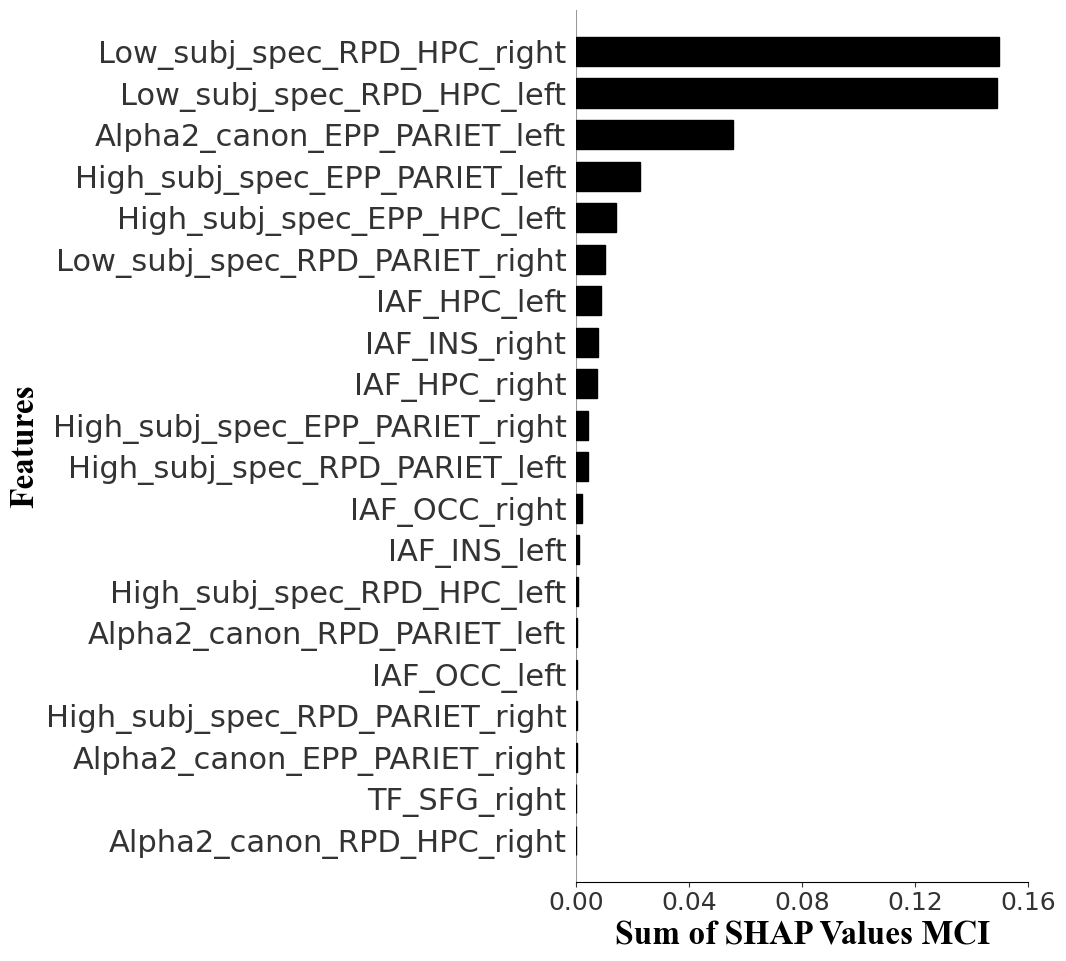

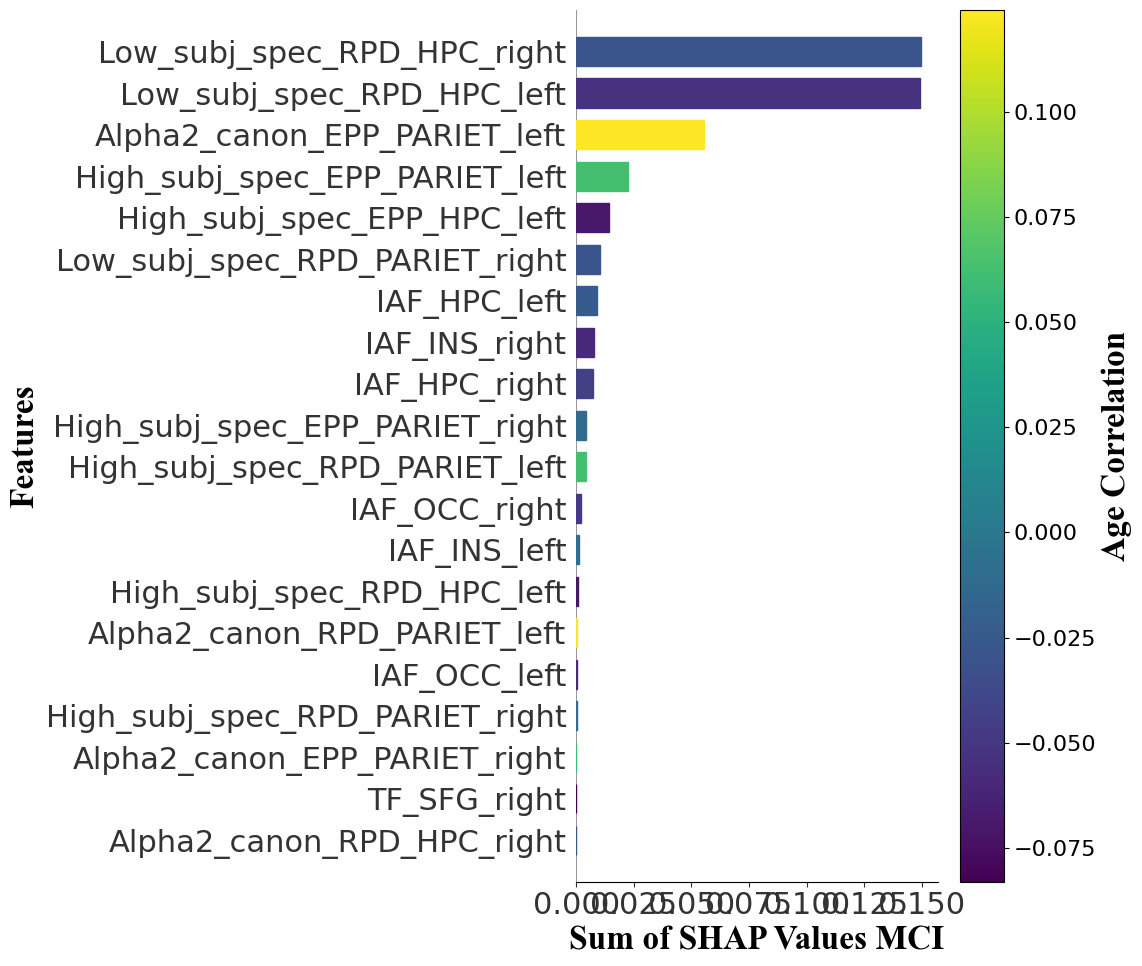

In [50]:
Plotters.plot_feature_importance(shap_values=shap_values_MCI,X_test=X_MCI,y_test=y_MCI, font= "Times New Roman", fontsize=24, xlabel1='Shap Values MCI', xlabel2='Sum of SHAP Values MCI',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [51]:
shap_per_region_sorted_MCI, normalized_result_sorted_MCI=model.shap_region(shap_summary_sorted=shap_summary_sorted_MCI, num_max=20)

HPC_left: 1.000000
HPC_right: 0.907709
PARIET_left: 0.477355
PARIET_right: 0.086219
INS_right: 0.044131
OCC_right: 0.011551
INS_left: 0.006597
OCC_left: 0.001344
SFG_right: 0.000100


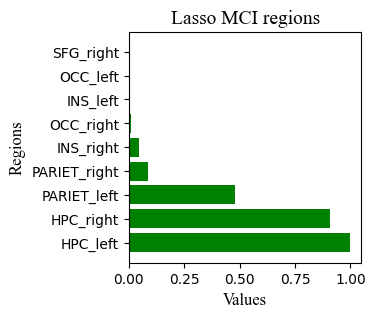

In [52]:
Plotters.plot_normalized_values(normalized_result_sorted_MCI, color='green', name_set='Lasso MCI regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


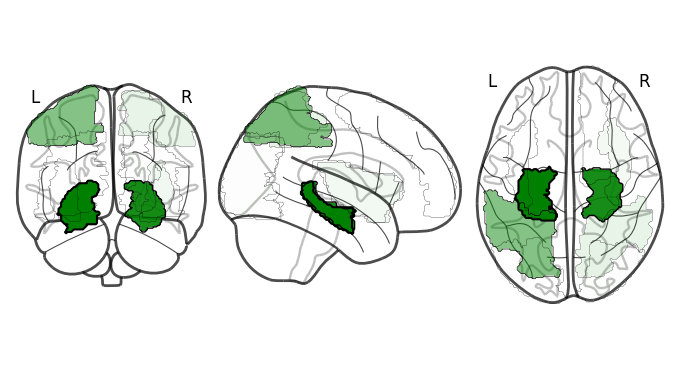

In [53]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='green')

# SHAP PD

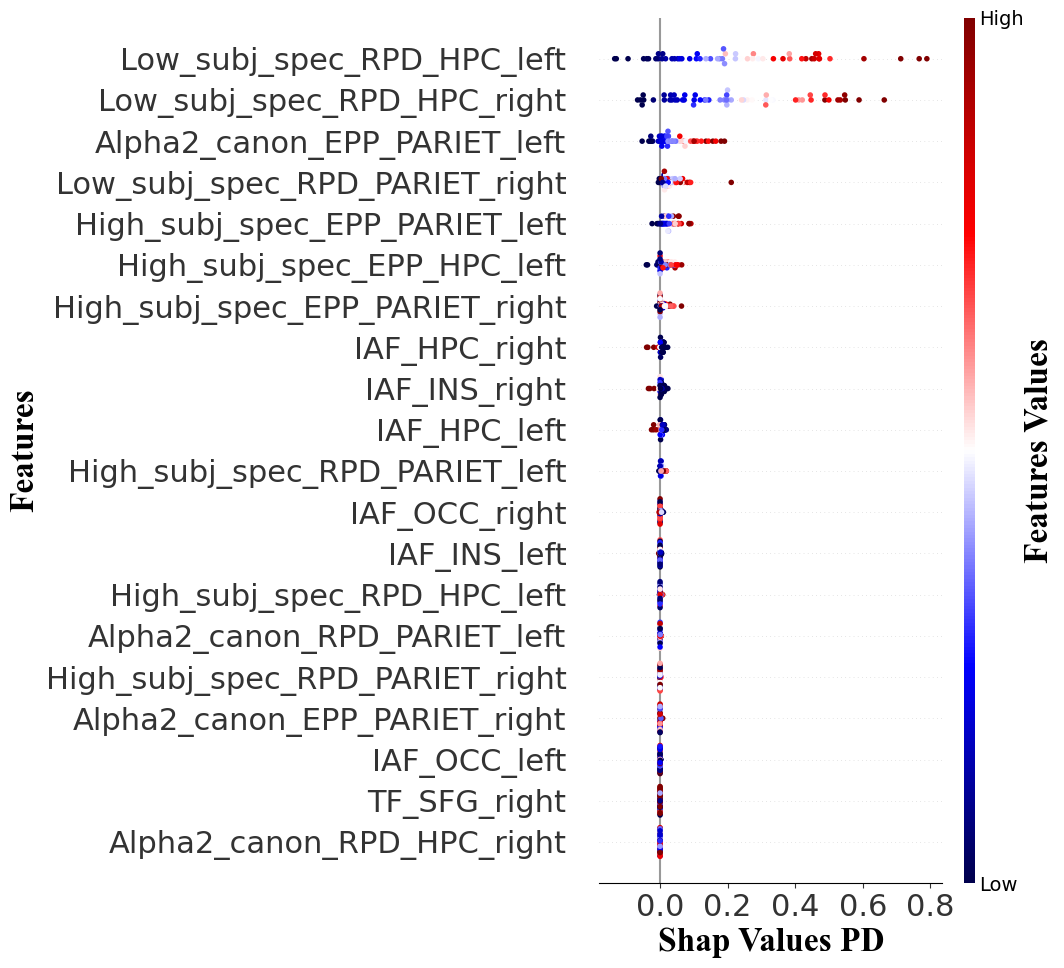

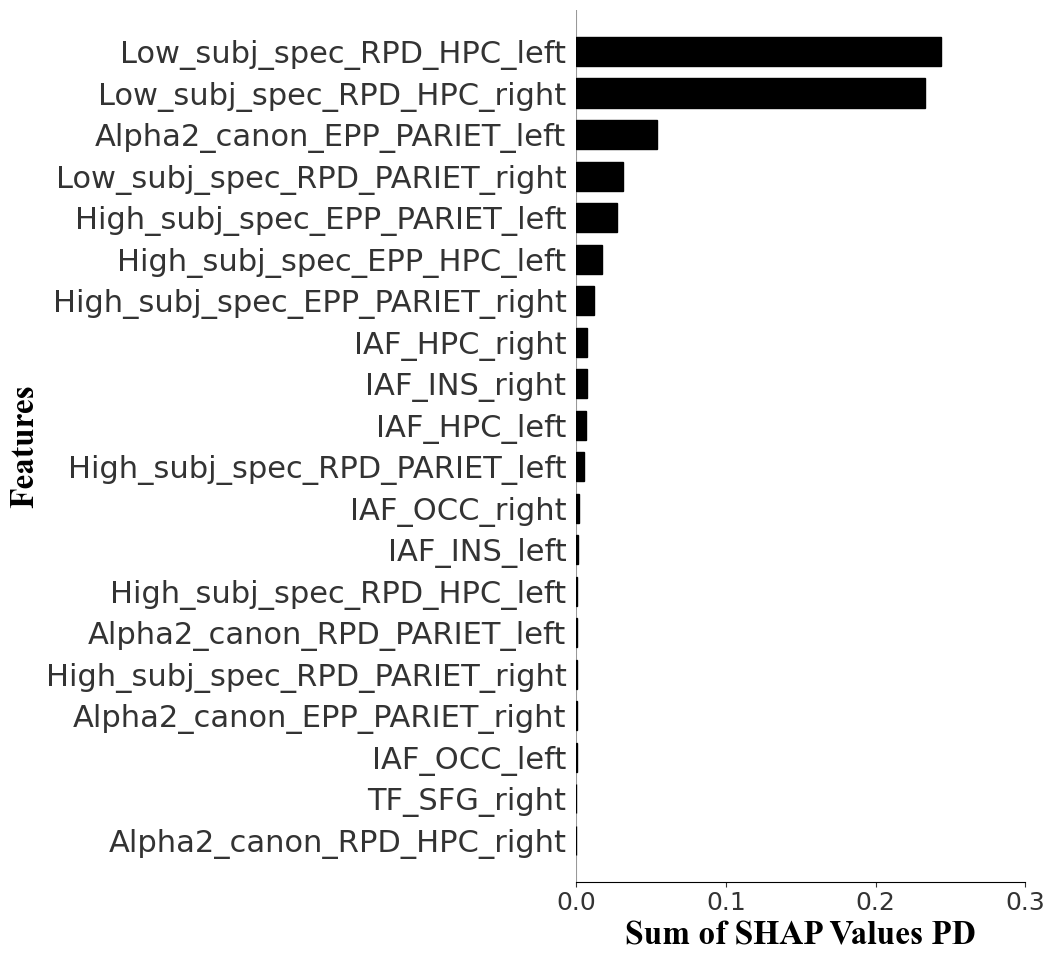

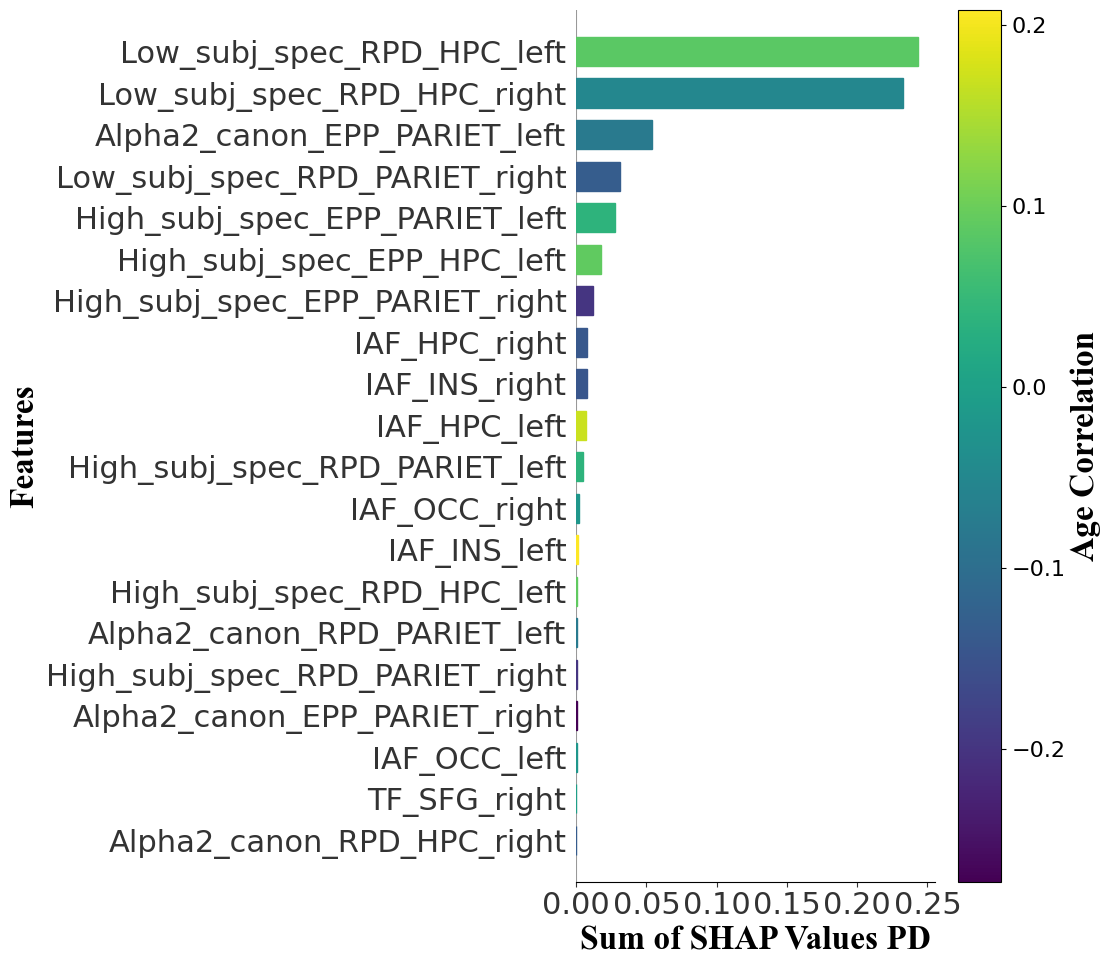

In [54]:
Plotters.plot_feature_importance(shap_values=shap_values_PD,X_test=X_PD,y_test=y_PD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values PD', xlabel2='Sum of SHAP Values PD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [55]:
shap_per_region_sorted_PD, normalized_result_sorted_PD=model.shap_region(shap_summary_sorted=shap_summary_sorted_PD, num_max=20)

HPC_left: 1.000000
HPC_right: 0.894313
PARIET_left: 0.323472
PARIET_right: 0.162776
INS_right: 0.027597
OCC_right: 0.006816
INS_left: 0.003738
OCC_left: 0.000932
SFG_right: 0.000073


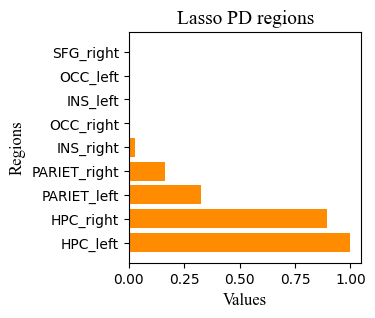

In [56]:
Plotters.plot_normalized_values(normalized_result_sorted_PD, color='darkorange', name_set='Lasso PD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


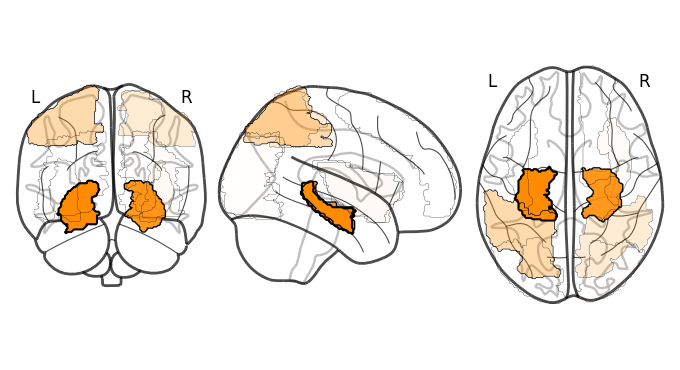

In [57]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_PD, base_path, color='darkorange')

# Associations

In [14]:
import pandas as pd

df_CN_combined = pd.read_excel('results/df_CN_combined_sin_Cuba.xlsx')
df_AD_combined = pd.read_excel('results/df_AD_combined_sin_Cuba.xlsx')
df_FTD_combined = pd.read_excel('results/df_FTD_combined_sin_Cuba.xlsx')
df_MCI_combined = pd.read_excel('results/df_MCI_combined_sin_Cuba.xlsx')
df_PD_combined = pd.read_excel('results/df_PD_combined_sin_Cuba.xlsx')



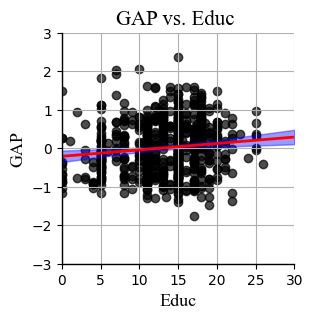

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo Educ < 30
df_filtered = df_CN_combined[df_CN_combined['Educ'] < 30]
Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['Educ'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=0,y_min_limit=-3,x_max_limit=30,y_max_limit=3,color='Black', title='GAP vs. Educ ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Educ',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)

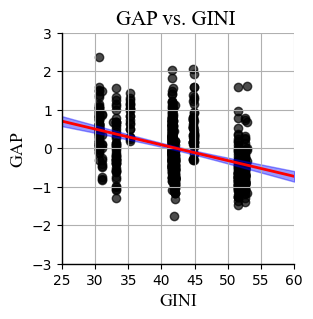

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo GINI < 30 y eliminar filas con valores nulos en GINI
df_filtered = df_CN_combined[(df_CN_combined['Educ'] < 30) & (df_CN_combined['GINI'].notna())]
Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['GINI'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=25,y_min_limit=-3,x_max_limit=60,y_max_limit=3,color='Black', title='GAP vs. GINI ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='GINI',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)

# Clasificación usando Brain Age

In [ ]:
df_CN_combined 
df_AD_combined 
df_FTD_combined 
df_MCI_combined
df_PD_combined


In [85]:
df_FTD_combined

ID-unique  y_labels     y_pred  y_pred_corrected        GAP  \
0           0      78.0  66.878498         78.528982 -11.121502   
1           2      67.0  66.493434         67.294785  -0.506566   
2           3      79.0  66.575359         79.237676 -12.424641   
3           4      67.0  67.187806         67.960647   0.187806   
4           5      67.0  66.203470         66.971334  -0.796530   
5           6      69.0  66.726138         69.510181  -2.273862   
6           7      72.0  66.052231         71.788526  -5.947769   
7           9      84.0  66.438548         84.042714 -17.561452   
8          11      75.0  66.654535         75.311329  -8.345465   
9          12      65.0  67.190570         66.009921   2.190570   
10         15      57.0  66.506495         57.481759   9.506495   
11         16      61.0  66.657584         61.542046   5.657584   
12         17      69.0  66.409518         69.213716  -2.590482   
13         18      87.0  64.273025         84.822202 -22.726975   
14         19      57.0  67.035983         58.000422  10.035983   
15         20      80.0  65.979138         79.589255 -14.020862   
16         21      78.0  66.945144         78.607910 -11.054856   
17         22      83.0  64.347961         80.935352 -18.652039   
18         23      79.0  64.364562         77.017743 -14.635438   
19         24      58.0  66.777548         58.727377   8.777548   
20         25      63.0  66.140586         62.987946   3.140586   
21         26      65.0  66.514590         65.373868   1.514590   
22         27      79.0  66.974273         79.604320 -12.025727   
23         28      60.0  66.769876         60.652543   6.769876   
24         29      69.0  66.841956         69.631732  -2.158044   
25         30      62.0  68.198283         64.070495   6.198283   
26         31      70.0  66.227398         69.947690  -3.772602   
27         32      59.0  66.512496         59.469291   7.512496   
28         33      56.0  66.904829         56.898373  10.904829   
29         34      72.0  66.846220         72.589496  -5.153780   
30         35      82.0  67.073230         82.698177 -14.926770   
31         36      59.0  67.000709         59.960336   8.000709   
32         37      64.0  66.238522         64.086716   2.238522   
33         38      71.0  66.046572         70.776519  -4.953428   
34         39      78.0  67.339811         78.958658 -10.660189   
35         40      69.0  67.030185         69.786421  -1.969815   
36         41      64.0  66.582370         64.472358   2.582370   
37         42      68.0  66.585930         68.343279  -1.414070   
38         43      69.0  69.018310         71.833113   0.018310   
39         44      74.0  66.253706         73.981588  -7.746294   
40         45      74.0  66.585563         74.265404  -7.414437   
41         46      59.0  66.561362         59.461071   7.561362   
42         47      77.0  68.191707         78.856936  -8.808293   
43         48      72.0  66.054566         71.819231  -5.945434   
44         49      77.0  66.656472         77.305300 -10.343528   
45         50      61.0  66.795345         61.662397   5.795345   
46         51      77.0  66.900499         77.574532 -10.099501   
47         52      69.0  66.544660         69.325573  -2.455340   
48         53      63.0  66.281091         63.147228   3.281091   
49         54      75.0  66.225656         74.900425  -8.774344   
50         55      76.0  66.623724         76.299702  -9.376276   
51         56      64.0  65.755627         63.599493   1.755627   
52         57      72.0  66.814300         72.583587  -5.185700   
53         58      75.0  68.704340         77.414980  -6.295660   
54         59      63.0  65.961048         62.835880   2.961048   
55         60      65.0  66.365090         65.227204   1.365090   
56         61      60.0  66.231313         60.159467   6.231313   

    GAP_corrected                                  Country_ID   Age  Sex  \
0        0.528982                        

In [86]:
import pandas as pd

# Función para clasificar EDUC en "alto" y "bajo" usando la mediana
def clasificar_educ(df):
    # Convertir la columna 'Educ' a numérico, ignorando errores (por si hay valores no numéricos)
    df['Educ'] = pd.to_numeric(df['Educ'], errors='coerce')
    
    # Filtrar valores de EDUC válidos y calcular la mediana
    mediana_educ = df[(df['Educ'] < 30) & (df['Educ'] > 0)]['Educ'].median()
    
    # Clasificar en 'alto' y 'bajo', excluyendo valores no válidos
    df['Educ_level'] = df['Educ'].apply(lambda x: 'alto' if x > mediana_educ else 'bajo' if (x < 30 and x > 0) else None)
    
    return df

# Aplicar la función a cada dataset
df_CN_combined = clasificar_educ(df_CN_combined)
df_AD_combined = clasificar_educ(df_AD_combined)
df_FTD_combined = clasificar_educ(df_FTD_combined)
df_MCI_combined = clasificar_educ(df_MCI_combined)
df_PD_combined = clasificar_educ(df_PD_combined)

# Combinar todos los datasets en uno solo
df_combined = pd.concat([df_CN_combined, df_AD_combined, df_FTD_combined, df_MCI_combined, df_PD_combined], ignore_index=True)

# Opcional: visualizar el dataframe combinado para confirmar
print(df_combined.head())


   ID-unique y_labels     y_pred  y_pred_corrected       GAP  GAP_corrected  \
0        209     69.0  66.910781         69.719055 -2.089219       0.719055   
1        210     73.0  66.336563         73.098623 -6.663437       0.098623   
2        211     68.0  66.759272         68.564401 -1.240728       0.564401   
3        212     58.0  67.092514         59.056564  9.092514       1.056564   
4        213     57.0  66.613192         57.582514  9.613192       0.582514   

           Country_ID   Age  Sex  Educ  MMSE    HDI       GINI        ODQ  \
0  ARG_B1_sub-10002    69.0  2.0  15.0  29.0  0.851  41.793333  99.483527   
1  ARG_B1_sub-10003    73.0  2.0  15.0  30.0  0.851  41.793333  99.109256   
2  ARG_B1_sub-10004    68.0  2.0  15.0  30.0  0.851  41.793333  99.577949   
3  ARG_B1_sub-10006    58.0  1.0  15.0  28.0  0.851  41.793333  99.350428   
4  ARG_B1_sub-10007    57.0  2.0  14.0  27.0  0.851  41.793333  98.395977   

  Educ_level  
0       bajo  
1       bajo  
2       bajo  
3 

In [87]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Función para entrenar un modelo de regresión logística
def entrenar_modelo(df, grupo_nombre):
    # Convertir 'Educ_level' en variable binaria: 'alto' = 1, 'bajo' = 0
    df['Educ_level_bin'] = df['Educ_level'].apply(lambda x: 1 if x == 'alto' else 0)

    # Separar características (X) y variable objetivo (y)
    X = df[['GAP_corrected']]
    y = df['Educ_level_bin']
    
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Imprimir resultados
    print(f"Resultados para el grupo {grupo_nombre}:")
    print(f"Precisión: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Matriz de confusión:\n{cm}\n")
    
    return model

# Aplicar la función a cada grupo por separado
print("Entrenando por grupos separados...\n")
model_CN = entrenar_modelo(df_CN_combined, 'CN')
model_AD = entrenar_modelo(df_AD_combined, 'AD')
model_FTD = entrenar_modelo(df_FTD_combined, 'FTD')
model_MCI = entrenar_modelo(df_MCI_combined, 'MCI')
model_PD = entrenar_modelo(df_PD_combined, 'PD')

# Combinar todos los grupos y entrenar un modelo conjunto
df_combined['Educ_level_bin'] = df_combined['Educ_level'].apply(lambda x: 1 if x == 'alto' else 0)

# Separar características (X) y variable objetivo (y) para el conjunto combinado
X_combined = df_combined[['GAP_corrected']]
y_combined = df_combined['Educ_level_bin']

# Dividir en conjunto de entrenamiento y prueba para el conjunto combinado
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística para el conjunto combinado
print("Entrenando con todos los grupos combinados...\n")
model_combined = LogisticRegression()
model_combined.fit(X_train_combined, y_train_combined)

# Predecir en el conjunto de prueba combinado
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluar el modelo combinado
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
auc_combined = roc_auc_score(y_test_combined, y_pred_combined)
cm_combined = confusion_matrix(y_test_combined, y_pred_combined)

# Imprimir resultados del modelo combinado
print(f"Resultados del modelo combinado:")
print(f"Precisión: {accuracy_combined}")
print(f"AUC: {auc_combined}")
print(f"Matriz de confusión:\n{cm_combined}")


Entrenando por grupos separados...

Resultados para el grupo CN:
Precisión: 0.7376237623762376
AUC: 0.5
Matriz de confusión:
[[149   0]
 [ 53   0]]

Resultados para el grupo AD:
Precisión: 0.5978260869565217
AUC: 0.5
Matriz de confusión:
[[55  0]
 [37  0]]

Resultados para el grupo FTD:
Precisión: 0.2222222222222222
AUC: 0.2916666666666667
Matriz de confusión:
[[ 1 11]
 [ 3  3]]

Resultados para el grupo MCI:
Precisión: 0.4927536231884058
AUC: 0.48005093378607816
Matriz de confusión:
[[23 15]
 [20 11]]

Resultados para el grupo PD:
Precisión: 0.5294117647058824
AUC: 0.4714285714285714
Matriz de confusión:
[[8 2]
 [6 1]]

Entrenando con todos los grupos combinados...

Resultados del modelo combinado:
Precisión: 0.6303797468354431
AUC: 0.48823529411764705
Matriz de confusión:
[[249   6]
 [140   0]]


In [88]:
df_FTD_combined

ID-unique  y_labels     y_pred  y_pred_corrected        GAP  \
0           0      78.0  66.878498         78.528982 -11.121502   
1           2      67.0  66.493434         67.294785  -0.506566   
2           3      79.0  66.575359         79.237676 -12.424641   
3           4      67.0  67.187806         67.960647   0.187806   
4           5      67.0  66.203470         66.971334  -0.796530   
5           6      69.0  66.726138         69.510181  -2.273862   
6           7      72.0  66.052231         71.788526  -5.947769   
7           9      84.0  66.438548         84.042714 -17.561452   
8          11      75.0  66.654535         75.311329  -8.345465   
9          12      65.0  67.190570         66.009921   2.190570   
10         15      57.0  66.506495         57.481759   9.506495   
11         16      61.0  66.657584         61.542046   5.657584   
12         17      69.0  66.409518         69.213716  -2.590482   
13         18      87.0  64.273025         84.822202 -22.726975   
14         19      57.0  67.035983         58.000422  10.035983   
15         20      80.0  65.979138         79.589255 -14.020862   
16         21      78.0  66.945144         78.607910 -11.054856   
17         22      83.0  64.347961         80.935352 -18.652039   
18         23      79.0  64.364562         77.017743 -14.635438   
19         24      58.0  66.777548         58.727377   8.777548   
20         25      63.0  66.140586         62.987946   3.140586   
21         26      65.0  66.514590         65.373868   1.514590   
22         27      79.0  66.974273         79.604320 -12.025727   
23         28      60.0  66.769876         60.652543   6.769876   
24         29      69.0  66.841956         69.631732  -2.158044   
25         30      62.0  68.198283         64.070495   6.198283   
26         31      70.0  66.227398         69.947690  -3.772602   
27         32      59.0  66.512496         59.469291   7.512496   
28         33      56.0  66.904829         56.898373  10.904829   
29         34      72.0  66.846220         72.589496  -5.153780   
30         35      82.0  67.073230         82.698177 -14.926770   
31         36      59.0  67.000709         59.960336   8.000709   
32         37      64.0  66.238522         64.086716   2.238522   
33         38      71.0  66.046572         70.776519  -4.953428   
34         39      78.0  67.339811         78.958658 -10.660189   
35         40      69.0  67.030185         69.786421  -1.969815   
36         41      64.0  66.582370         64.472358   2.582370   
37         42      68.0  66.585930         68.343279  -1.414070   
38         43      69.0  69.018310         71.833113   0.018310   
39         44      74.0  66.253706         73.981588  -7.746294   
40         45      74.0  66.585563         74.265404  -7.414437   
41         46      59.0  66.561362         59.461071   7.561362   
42         47      77.0  68.191707         78.856936  -8.808293   
43         48      72.0  66.054566         71.819231  -5.945434   
44         49      77.0  66.656472         77.305300 -10.343528   
45         50      61.0  66.795345         61.662397   5.795345   
46         51      77.0  66.900499         77.574532 -10.099501   
47         52      69.0  66.544660         69.325573  -2.455340   
48         53      63.0  66.281091         63.147228   3.281091   
49         54      75.0  66.225656         74.900425  -8.774344   
50         55      76.0  66.623724         76.299702  -9.376276   
51         56      64.0  65.755627         63.599493   1.755627   
52         57      72.0  66.814300         72.583587  -5.185700   
53         58      75.0  68.704340         77.414980  -6.295660   
54         59      63.0  65.961048         62.835880   2.961048   
55         60      65.0  66.365090         65.227204   1.365090   
56         61      60.0  66.231313         60.159467   6.231313   

    GAP_corrected                                  Country_ID   Age  Sex  \
0        0.528982                        